## Logistic Regression

#### Importing libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#### Importing Attrition CSV File and dropping null values

In [3]:
df = pd.read_csv("../WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = df.dropna(axis='columns', how='all')
df = df.drop(columns = ['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


#### Adding new variables

In [4]:
monthlyIncomeBins = [0,2000,4000,6000,8000,10000,20000]
monthlyIncomeLabels = [0,1,2,3,4,5]
df['MonthlyIncomeBins'] = pd.cut(df['MonthlyIncome'], bins=monthlyIncomeBins, labels=monthlyIncomeLabels)
df['PromotionRatio'] = df['YearsSinceLastPromotion']/df['YearsAtCompany']
df['PromotionRatio'] = df['PromotionRatio'].fillna(0)
df['PromotionRatio'] = df['PromotionRatio'].replace(np.inf,0)
df['ManagerRatio'] = df['YearsWithCurrManager']/df['YearsAtCompany']
df['ManagerRatio'] = df['ManagerRatio'].fillna(0)
df['ManagerRatio'] = df['ManagerRatio'].replace(np.inf,0)
df['CompanyRatio'] = df['YearsAtCompany']/df['TotalWorkingYears']
df['CompanyRatio'] = df['CompanyRatio'].fillna(0)
df['CompanyRatio'] = df['CompanyRatio'].replace(np.inf,0)
df['SpecificIncome'] = df['MonthlyIncome']/np.mean(df['MonthlyIncome'])
df['SpecificIncome'] = df['SpecificIncome'].fillna(0)
df['Role-Manager-Ratio'] = df['YearsInCurrentRole']/df['YearsWithCurrManager']
df['Role-Manager-Ratio'] = df['Role-Manager-Ratio'].fillna(0)
df['Role-Manager-Ratio'] = df['Role-Manager-Ratio'].replace(np.inf,0)
df['Yearspercompany']=(df['TotalWorkingYears']/df['NumCompaniesWorked']+1)
df['Yearspercompany'] = df['Yearspercompany'].fillna(0)
df['Yearspercompany'] = df['Yearspercompany'].replace(np.inf,0)
df['AverageTimePerCompany'] = (df['Age']-20) / ((df)['NumCompaniesWorked']+1)
df['SatisfactionAverage'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5
df['Fidelity'] = (df['NumCompaniesWorked']/df['TotalWorkingYears'])
df['Fidelity'] = df['Fidelity'].replace(np.Inf, 0)
df['Stability'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Stability'].fillna((df['Stability'].mean()), inplace=True)
df['RateRatio'] = df['HourlyRate'] / df['MonthlyRate']
def SalesDpt(df) :
    if df['Department'] == 'Sales':
        return 1
    else:
        return 0
df['SalesDpt'] = df.apply(lambda df:SalesDpt(df) ,axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncomeBins',
       'PromotionRatio', 'ManagerRatio', 'CompanyRatio', 'SpecificIncome',
       'Role-Manager-Ratio', 'Yearspercompany', 'AverageTimePerCompany',
       'SatisfactionAverage', 'Fidelity', 'Stability', 'RateRatio',
       'SalesDpt'],
      dtype='object')

#### Creating a correlation matrix

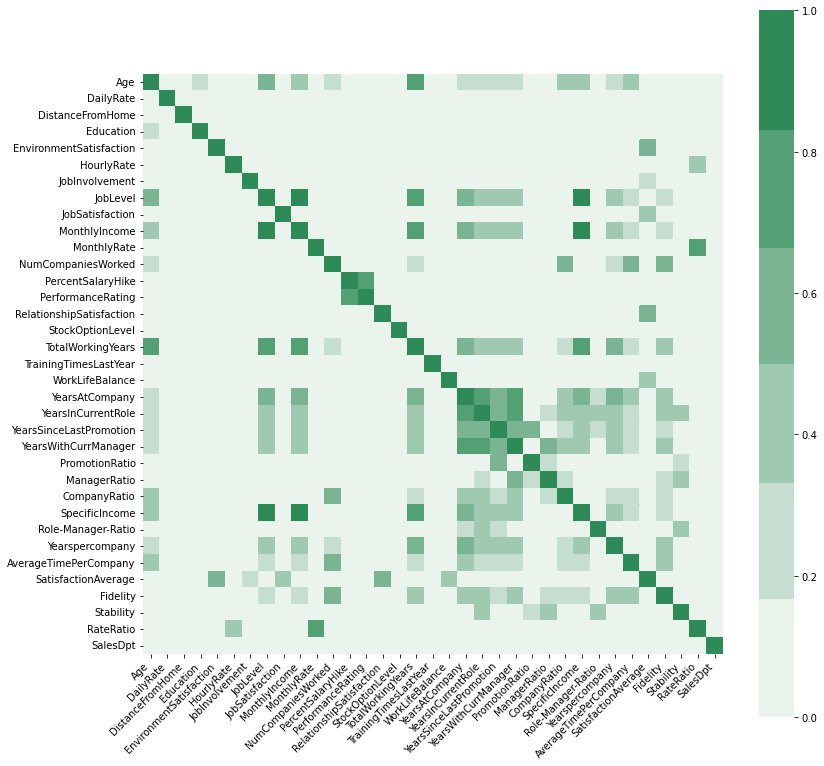

In [5]:
corr = df.corr().abs()
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.light_palette("seagreen"),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Dropping correlated columns

In [6]:
corrLimit = .6
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
dropColumns = [column for column in upper.columns if any(upper[column] > corrLimit)]

print('Columns to remove: %d' % (len(dropColumns)))
dropped = df.drop(columns = dropColumns)
dropColumns

Columns to remove: 10


['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PromotionRatio',
 'SpecificIncome',
 'RateRatio']

#### Creating X and y for Model (Dropped Features)

In [7]:
dropped = df.drop(columns = ["Attrition"])
data_binary_encoded = pd.get_dummies(dropped)
X=data_binary_encoded
y=df["Attrition"].replace({'Yes': 1, 'No': 0})
X.shape

(1470, 69)

#### Creating a Function that runs Logistic Regression Model and returns a list with:
[Train Score, Test Score, Precision Score, Accuracy Score, F1 Score, Recall Score, Classification Report]

In [8]:
def createModel(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    model = LogisticRegression()
    model = model.fit(X_train_scaled, y_train)
    trainScore = model.score(X_train_scaled,y_train)
    testScore = model.score(X_test_scaled,y_test)
    test = model.predict(X)
    precisionScore = precision_score(y,test)
    accuracyScore = accuracy_score(y,test)
    f1Score = f1_score(y,test)
    recallScore = recall_score(y,test)
    classRep = classification_report(y,test)
    retList = [trainScore, testScore, precisionScore, accuracyScore, f1Score, recallScore, classRep]
    return retList

modelResults = createModel(X)
print(f'\033[1m Train Score: \033[0;0m {round(modelResults[0],3)}')
print(f'\033[1m Test Score: \033[0;0m {round(modelResults[1],3)}')
print(f'\033[1m Precision Score: \033[0;0m {round(modelResults[2],3)}')
print(f'\033[1m Accuracy Score: \033[0;0m {round(modelResults[3],3)}')
print(f'\033[1m F1 Score: \033[0;0m {round(modelResults[4],3)}')
print(f'\033[1m Recall Score: \033[0;0m {round(modelResults[5],3)}')
print("\033[1m Classification Report: \033[0;0m")
print(modelResults[6])

 Train Score:  0.907
 Test Score:  0.883
 Precision Score:  0.179
 Accuracy Score:  0.411
 F1 Score:  0.288
 Recall Score:  0.738
 Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      1233
           1       0.18      0.74      0.29       237

    accuracy                           0.41      1470
   macro avg       0.53      0.54      0.39      1470
weighted avg       0.76      0.41      0.46      1470



Even though our initial model has over 88% Test and Train Scores, Precision Score was only 18% and Accuracy Score under 50%. The model is probably overtrained, to get the best results and lower the amount of variables needed BRUTE FORCE was applied.

#### Selecting Features

In [8]:
features = ['OverTime', 'Fidelity', 'MaritalStatus','Gender', 'Department', 'BusinessTravel', 'SalesDpt',
            'Age', 'Stability', 'RateRatio', 'AverageTimePerCompany', 'SatisfactionAverage', 'StockOptionLevel',
            'PerformanceRating', 'TrainingTimesLastYear', 'YearsWithCurrManager', 'DistanceFromHome', 'Education']

print("Total Features : "+str(len(features)))
features

Total Features : 18


['OverTime',
 'Fidelity',
 'MaritalStatus',
 'Gender',
 'Department',
 'BusinessTravel',
 'SalesDpt',
 'Age',
 'Stability',
 'RateRatio',
 'AverageTimePerCompany',
 'SatisfactionAverage',
 'StockOptionLevel',
 'PerformanceRating',
 'TrainingTimesLastYear',
 'YearsWithCurrManager',
 'DistanceFromHome',
 'Education']

In [9]:
testCombinations = []
for i in range(5, len(features)):
    testCombinations += list(combinations(features, i))

print(f'Total Combinations: {len(testCombinations)}')

Total Combinations: 258095


#### BRUTE FORCE

In [10]:
minCombinations = 5
newFeatures = []
for i in range(minCombinations, len(features)):
    newFeatures += list(combinations(features, i))

# Uncomment the next line to create a fast example
#newFeatures = list(combinations(features, len(features)-1))
scores = []
counter = 1

for i in newFeatures:
    if (counter%(round(len(newFeatures)/20,0))==0):
        print(f'Progress {round(counter/len(newFeatures)*100,1)}% {counter}/{len(newFeatures)}')
    counter += 1
    newDF = df.filter(i, axis=1)
    X = pd.get_dummies(newDF)
    retList = createModel(X)
    retList.append(i)
    retList.append(len(i))
    scores.append(retList)

print("Models processing complete!")

Progress 5.0% 12905/258095
Progress 10.0% 25810/258095
Progress 15.0% 38715/258095
Progress 20.0% 51620/258095
Progress 25.0% 64525/258095
Progress 30.0% 77430/258095
Progress 35.0% 90335/258095
Progress 40.0% 103240/258095
Progress 45.0% 116145/258095
Progress 50.0% 129050/258095
Progress 55.0% 141955/258095
Progress 60.0% 154860/258095
Progress 65.0% 167765/258095
Progress 70.0% 180670/258095
Progress 75.0% 193575/258095
Progress 80.0% 206480/258095
Progress 85.0% 219385/258095
Progress 90.0% 232290/258095
Progress 95.0% 245195/258095
Models processing complete!


#### Creating a Dataframe of Results sorted by F1Score

In [11]:
# Converting to Dataframe and Sorting
scoresDF = pd.DataFrame(scores)
scoresDF.columns = ["trainScore", "testScore", "precisionScore","accuracyScore", "f1Score","recallScore", "classificationReport", "Features", "featureCount"]
scoresDF = scoresDF.sort_values(["f1Score"], ascending=False)
scoresDF

,trainScore,testScore,precisionScore,accuracyScore,f1Score,recallScore,classificationReport,Features,featureCount
58980,0.866606,0.817935,0.517766,0.843537,0.470046,0.430380,precision recall f1-score ...,"(OverTime, Fidelity, MaritalStatus, Gender, De...",8
102727,0.866606,0.817935,0.517766,0.843537,0.470046,0.430380,precision recall f1-score ...,"(OverTime, Fidelity, MaritalStatus, Gender, De...",9
151966,0.865699,0.809783,0.520833,0.844218,0.466200,0.421941,precision recall f1-score ...,"(OverTime, Fidelity, MaritalStatus, Gender, De...",10
59255,0.867514,0.815217,0.512690,0.842177,0.465438,0.426160,precision recall f1-score ...,"(OverTime, Fidelity, MaritalStatus, Gender, Bu...",8
103236,0.865699,0.809783,0.518135,0.843537,0.465116,0.421941,precision recall f1-score ...,"(OverTime, Fidelity, MaritalStatus, Gender, De...",9
...,...,...,...,...,...,...,...,...,...
112821,0.864791,0.836957,0.000000,0.838776,0.000000,0.000000,precision recall f1-score ...,"(OverTime, Fidelity, BusinessTravel, SalesDpt,...",9
112823,0.870236,0.845109,0.000000,0.838776,0.000000,0.000000,precision recall f1-score ...,"(OverTime, Fidelity, BusinessTravel, SalesDpt,...",9
112826,0.870236,0.845109,0.000000,0.838776,0.000000,0.000000,precision recall f1-score ...,"(OverTime, Fidelity, BusinessTravel, SalesDpt,...",9
112844,0.870236,0.839674,0.000000,0.838776,0.000000,0.000000,precision recall f1-score ...,"(OverTime, Fidelity, BusinessTravel, SalesDpt,...",9


#### Results Analysis

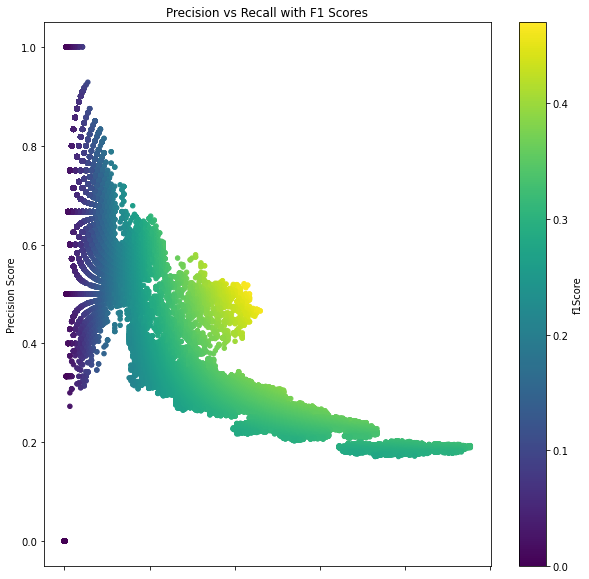

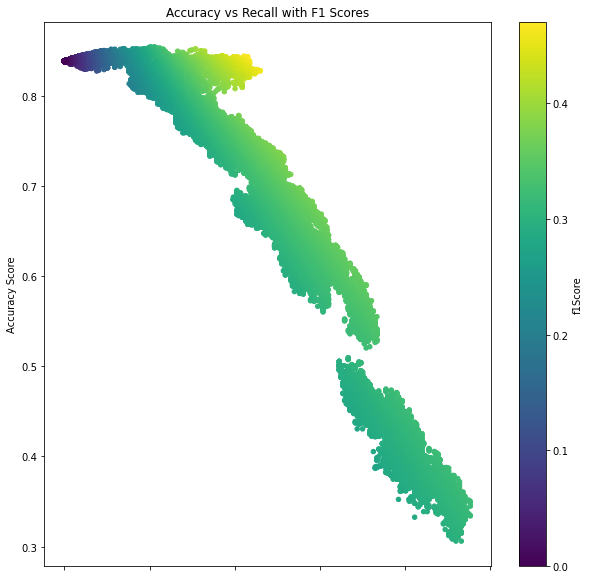

In [15]:
ax = scoresDF.plot(kind='scatter', 
                    x='recallScore', 
                    y='precisionScore', 
                    c='f1Score', 
                    colormap='viridis',
                    figsize=(10,10))
plt.ylabel('Precision Score')
plt.title('Precision vs Recall with F1 Scores')
plt.show()

ax1 = scoresDF.plot(kind='scatter', 
                    x='recallScore', 
                    y='accuracyScore', 
                    c='f1Score', 
                    colormap='viridis',
                    figsize=(10,10))
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Recall with F1 Scores')
plt.show()

#### Feature Importance on Filtered Models

 Top Models Total: 898


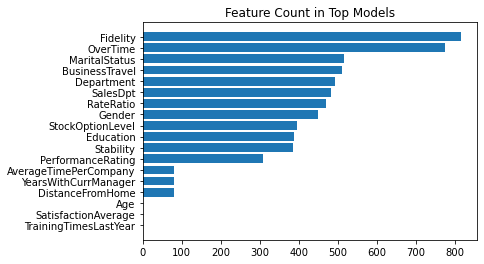

In [20]:
filterDF = scoresDF.loc[scoresDF["f1Score"]>.35] \
    .loc[scoresDF["precisionScore"]>.35] \
    .loc[scoresDF["accuracyScore"]>.7] \
    .loc[scoresDF["recallScore"]>.3] \
    .loc[scoresDF["featureCount"]<10]
filterDF['Features'] = filterDF['Features'].astype(str)
countDict = {} 
for feature in features:
    countDict[feature] = len(filterDF[filterDF['Features'].str.contains(feature)])

sortedDict = sorted(countDict.items(), key=lambda x: x[1], reverse=True)
xval = []
yval = []
for i in sortedDict:
    yval.append(i[0])
    xval.append(i[1]) 
    #print(i[0], i[1])

fig, ax = plt.subplots()
ax.barh(yval, xval)
ax.set_yticks(yval)
ax.set_yticklabels(yval)
ax.invert_yaxis()
ax.set_title('Feature Count in Top Models')
print(f'\033[1m Top Models Total: \033[0;0m{len(filterDF)}')
plt.show()

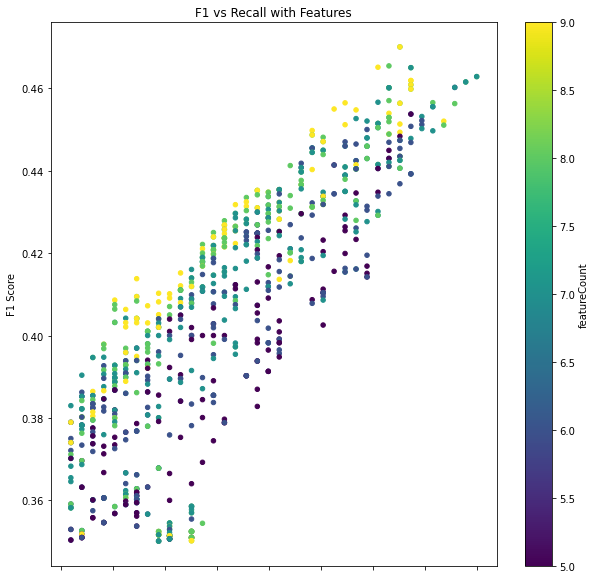

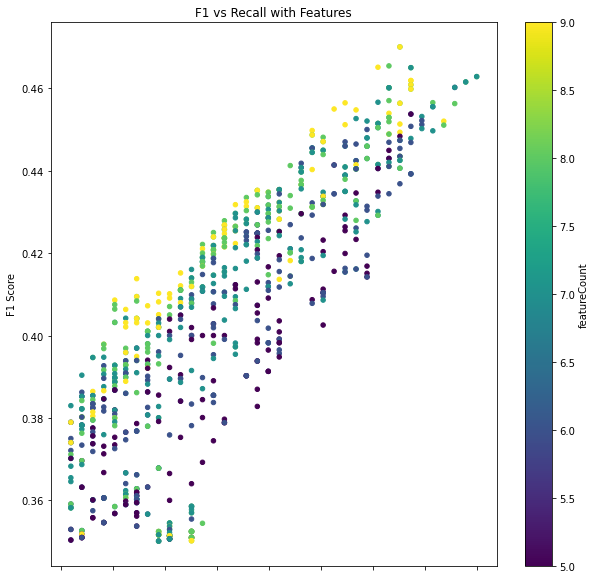

In [21]:
ax = filterDF.plot(kind='scatter', 
                    x='recallScore', 
                    y='f1Score', 
                    c='featureCount', 
                    colormap='viridis',
                    figsize=(10,10))
plt.ylabel('F1 Score')
plt.title('F1 vs Recall with Features')
plt.show()

ax1 = filterDF.plot(kind='scatter', 
                    x='recallScore', 
                    y='f1Score', 
                    c='featureCount', 
                    colormap='viridis',
                    figsize=(10,10))
plt.ylabel('F1 Score')
plt.title('F1 vs Recall with Features')
plt.show()

In [27]:
topModelsDF = filterDF.loc[filterDF["f1Score"]>.44] \
    .loc[filterDF["recallScore"]>.4] \
    .loc[filterDF["featureCount"]<6]
topModelsDF['totalScore'] = topModelsDF['trainScore']+topModelsDF['testScore']+topModelsDF['precisionScore']+topModelsDF['accuracyScore']+topModelsDF['f1Score']+topModelsDF['recallScore']
topModelsDF = topModelsDF.sort_values(["totalScore"], ascending=False)
topModelsDF

,trainScore,testScore,precisionScore,accuracyScore,f1Score,recallScore,classificationReport,Features,featureCount,totalScore
0,0.862069,0.820652,0.474654,0.831293,0.453744,0.434599,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Gen...",5,3.877012
2,0.862976,0.820652,0.467890,0.829252,0.448352,0.430380,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Gen...",5,3.859502
21,0.859347,0.820652,0.484848,0.834694,0.441379,0.405063,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Dep...",5,3.845984
27,0.859347,0.820652,0.465438,0.828571,0.444934,0.426160,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Bus...",5,3.845102
14,0.860254,0.820652,0.461187,0.827211,0.442982,0.426160,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Dep...",5,3.838447
18,0.861162,0.826087,0.460829,0.827211,0.440529,0.421941,precision recall f1-score ...,"('OverTime', 'Fidelity', 'MaritalStatus', 'Dep...",5,3.837758


#### Classification Reports on Best Models

In [29]:
print(scoresDF.loc[0][7])
print(scoresDF.loc[0][6])
print(scoresDF.loc[2][7])
print(scoresDF.loc[2][6])
print(scoresDF.loc[21][7])
print(scoresDF.loc[21][6])

('OverTime', 'Fidelity', 'MaritalStatus', 'Gender', 'Department')
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1233
           1       0.47      0.43      0.45       237

    accuracy                           0.83      1470
   macro avg       0.68      0.67      0.68      1470
weighted avg       0.83      0.83      0.83      1470

('OverTime', 'Fidelity', 'MaritalStatus', 'Gender', 'SalesDpt')
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1233
           1       0.47      0.43      0.45       237

    accuracy                           0.83      1470
   macro avg       0.68      0.67      0.67      1470
weighted avg       0.82      0.83      0.83      1470

('OverTime', 'Fidelity', 'MaritalStatus', 'Department', 'StockOptionLevel')
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1233
           1       0.48      0.

#### GridSearch with Best Model

In [19]:
finalFeatures = ['OverTime', 'Fidelity', 'MaritalStatus', 'Gender', 'SalesDpt']
data=df[finalFeatures]
data_binary_encoded = pd.get_dummies(data)
X=data_binary_encoded
y=df["Attrition"].replace({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
model = LogisticRegression()
model = model.fit(X_train_scaled, y_train)
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
]
grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
#grid.fit(X_train_scaled, y_train)
print("\033[1m ONLY PRINTING FINAL OUTPUT TO SAVE SPACE \033[0;0m")
print(" ")
print("GridSearchCV(estimator=LogisticRegression(), \
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03, \
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02, \
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00, \
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02, \
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), \
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}], \
             verbose=3)")

 ONLY PRINTING FINAL OUTPUT TO SAVE SPACE 
 
GridSearchCV(estimator=LogisticRegression(),              param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),                           'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],              verbose=3)


In [10]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 29.763514416313132, 'penalty': 'l2', 'solver': 'liblinear'}
0.8620526532291238


In [11]:
model2=grid.best_estimator_
weights=model2.coef_
for i, name in enumerate(X_train.columns):
    print(f"{name}: \t {np.absolute(weights[0][i])}")

Fidelity: 	 3.917240242167421
SalesDpt: 	 0.6625384531632804
OverTime_No: 	 1.2583808673029133
OverTime_Yes: 	 0.2261276421083769
MaritalStatus_Divorced: 	 0.8517355063937282
MaritalStatus_Married: 	 0.5569249516586878
MaritalStatus_Single: 	 0.37640723285794603
Gender_Female: 	 0.7450019224056729
Gender_Male: 	 0.2872513027888645


In [12]:
from joblib import dump, load
dump(model2, 'attrition_pred.lrm') 
dump(X_scaler, 'lrm.scaler')

['lrm.scaler']

In [16]:
model3=load('attrition_pred.lrm')
scaler=load('lrm.scaler')
test=model.predict(X)
print("\033[1m OLD: \033[0;0m")
print(modelResults[6])
print(" ")
print("\033[1m NEW: \033[0;0m")
print(classification_report(y,test))

 OLD: 
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      1233
           1       0.18      0.74      0.29       237

    accuracy                           0.41      1470
   macro avg       0.53      0.54      0.39      1470
weighted avg       0.76      0.41      0.46      1470

 
 NEW: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1233
           1       0.47      0.43      0.45       237

    accuracy                           0.83      1470
   macro avg       0.68      0.67      0.67      1470
weighted avg       0.82      0.83      0.83      1470



In [14]:
scoresDF.to_csv('finalScoresDF.csv', index=False, header=True)